<a href="https://colab.research.google.com/github/FelipeGonzalezGarrido/Coding-Dojo/blob/main/3.%20Advanced%20Machine%20Learning/Semana%203%20-%20Introduction%20to%20Deep%20Learning/Semana_3_Ejercicio_red_neuronal_Kaggle_EnProceso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount ("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/kagle/titanic/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    object 
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Preprocesamiento de datos entrenamiento**

In [ ]:
df = df.drop(columns=["Cabin","Ticket"], axis=1)
df = df[~df["Embarked"].isna()]
df.Age = df.Age.round()
mean_age = df.Age.mean()
df.Age.fillna(mean_age, inplace=True)
df["Pclass"] = df["Pclass"].astype(str)

In [ ]:
X = df.drop(columns="Survived")
y = df["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")
scaler = StandardScaler()
ohe = OneHotEncoder(handle_unknown = "ignore" , sparse=False)
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
preprocessor = make_column_transformer(num_tuple,cat_tuple)
preprocessor.fit(X_train)
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [ ]:
print(num_selector(X_train))
print(cat_selector(X_train))

['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare']
['Pclass', 'Name', 'Sex', 'Embarked']


In [ ]:
X_train_processed.shape

(666, 679)

In [ ]:
input_shape = X_train_processed.shape[1]
input_shape

679

In [ ]:
model = Sequential()
model.add(Dense(679,input_dim = input_shape, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'bce', optimizer = 'adam', metrics="acc")
early_stopping = EarlyStopping(patience = 3)
history = model.fit(X_train_processed, y_train,
                    validation_data = (X_test_processed, y_test), 
                    epochs=10)

Epoch 1/10
21/21 [==============================] - 1s 15ms/step - loss: 0.6003 - acc: 0.6757 - val_loss: 0.5055 - val_acc: 0.8072
Epoch 2/10
21/21 [==============================] - 0s 7ms/step - loss: 0.4533 - acc: 0.8198 - val_loss: 0.4522 - val_acc: 0.8117
Epoch 3/10
21/21 [==============================] - 0s 6ms/step - loss: 0.3800 - acc: 0.8453 - val_loss: 0.4431 - val_acc: 0.8117
Epoch 4/10
21/21 [==============================] - 0s 7ms/step - loss: 0.3334 - acc: 0.8589 - val_loss: 0.4481 - val_acc: 0.8072
Epoch 5/10
21/21 [==============================] - 0s 7ms/step - loss: 0.2880 - acc: 0.8814 - val_loss: 0.4580 - val_acc: 0.8072
Epoch 6/10
21/21 [==============================] - 0s 7ms/step - loss: 0.2461 - acc: 0.9099 - val_loss: 0.4637 - val_acc: 0.8072
Epoch 7/10
21/21 [==============================] - 0s 6ms/step - loss: 0.2022 - acc: 0.9354 - val_loss: 0.4626 - val_acc: 0.8117
Epoch 8/10
21/21 [==============================] - 0s 10ms/step - loss: 0.1604 - acc: 0.

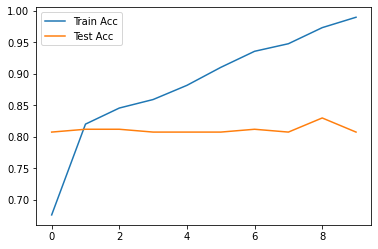

In [ ]:
plt.plot(history.history['acc'], label='Train Acc')
plt.plot(history.history['val_acc'], label='Test Acc')
plt.legend();

In [ ]:
test = pd.read_csv("/content/drive/MyDrive/Data CodingDojo/kagle/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Preprocesamiento de datos prueba**

In [ ]:
test = test.drop(columns=["Cabin","Ticket"], axis=1)
test.Age = test.Age.round()
mean_age = test.Age.mean()
test.Age.fillna(mean_age, inplace=True)
test["Pclass"] = test["Pclass"].astype(str)
test = test[~test["Fare"].isna()]



In [ ]:
X_train_processed.shape

(666, 679)

In [ ]:
test.shape

(417, 9)

In [ ]:
cat_selector = make_column_selector(dtype_include="object")
num_selector = make_column_selector(dtype_include="number")
num_tuple = (scaler, num_selector)
cat_tuple = (ohe, cat_selector)
preprocessor = make_column_transformer(num_tuple,cat_tuple)
preprocessor.fit(test)
test = preprocessor.transform(test)


In [ ]:
scaler.fit

<bound method StandardScaler.fit of StandardScaler()>

In [ ]:
test

array([[-1.72741966,  0.30427855, -0.50021819, ...,  0.        ,
         1.        ,  0.        ],
       [-1.71914006,  1.34023608,  0.61524163, ...,  0.        ,
         0.        ,  1.        ],
       [-1.71086045,  2.5355717 , -0.50021819, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.70861682,  0.62303471, -0.50021819, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.71689642,  0.00568467, -0.50021819, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.72517603,  0.00568467,  0.61524163, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
preds = model.predict(test)

ValueError: ignored

In [ ]:
model

SyntaxError: ignored